In [3]:
import settings
from stravalib.client import Client

client = Client(access_token = settings.STRAVA_ACCESS_TOKEN)

In [ ]:
import polyline
import functools
import pickle

polylines = map(lambda a: client.get_activity(a.id).map.polyline, client.get_activities())
points = map(lambda p: polyline.decode(p), polylines)
points = functools.reduce(lambda x, y: x + y, points, [])

with open('points.pickle', 'wb') as f:
    pickle.dump(points, f)

### Folium

https://github.com/python-visualization/folium/blob/master/folium/plugins/heat_map.py

In [1]:
import pickle
import folium
from folium import plugins

heatmap_map = folium.Map(location=[50.0595854, 14.3255417], zoom_start=10)

with open('points.pickle', 'rb') as f:
    points = pickle.load(f)
    hm = plugins.HeatMap(points, radius = 15, blur = 25)
    heatmap_map.add_child(hm)
f.close()

# heatmap_map.save("heatmap.html")

### Matplotlib

http://andykee.com/visualizing-strava-tracks-with-python.html

In [9]:
import polyline

polylines = map(lambda a: client.get_activity(a.id).map.polyline, client.get_activities(limit=100))
activities_points = list(map(lambda p: polyline.decode(p), polylines))


No such attribute available_zones on entity <Activity id=1751847211 name='Poprvé přes Zbraslav' resource_state=3>
No such attribute available_zones on entity <Activity id=1748595870 name='Lunch Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1748458282 name='Morning Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1747064746 name='Afternoon Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1746580987 name='Lunch Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1737611311 name='Afternoon Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1737413639 name='Lunch Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1737282490 name='Morning Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1733946479 name='Evening Ride' resource_state=3>
No such attribute similar_activities on 

No such attribute available_zones on entity <Activity id=1541026763 name='Afternoon Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1540607950 name='Lunch Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1538534903 name='Morning Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1530700540 name='Lunch Walk' resource_state=3>
No such attribute available_zones on entity <Activity id=1523034885 name='Evening Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1522390857 name='Afternoon Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1521941035 name='Pro kafe a do kavarny' resource_state=3>
No such attribute available_zones on entity <Activity id=1520608856 name='Evening Ride' resource_state=3>
No such attribute available_zones on entity <Activity id=1494891019 name='Evening Ride' resource_state=3>
No such attribute available_zones on 

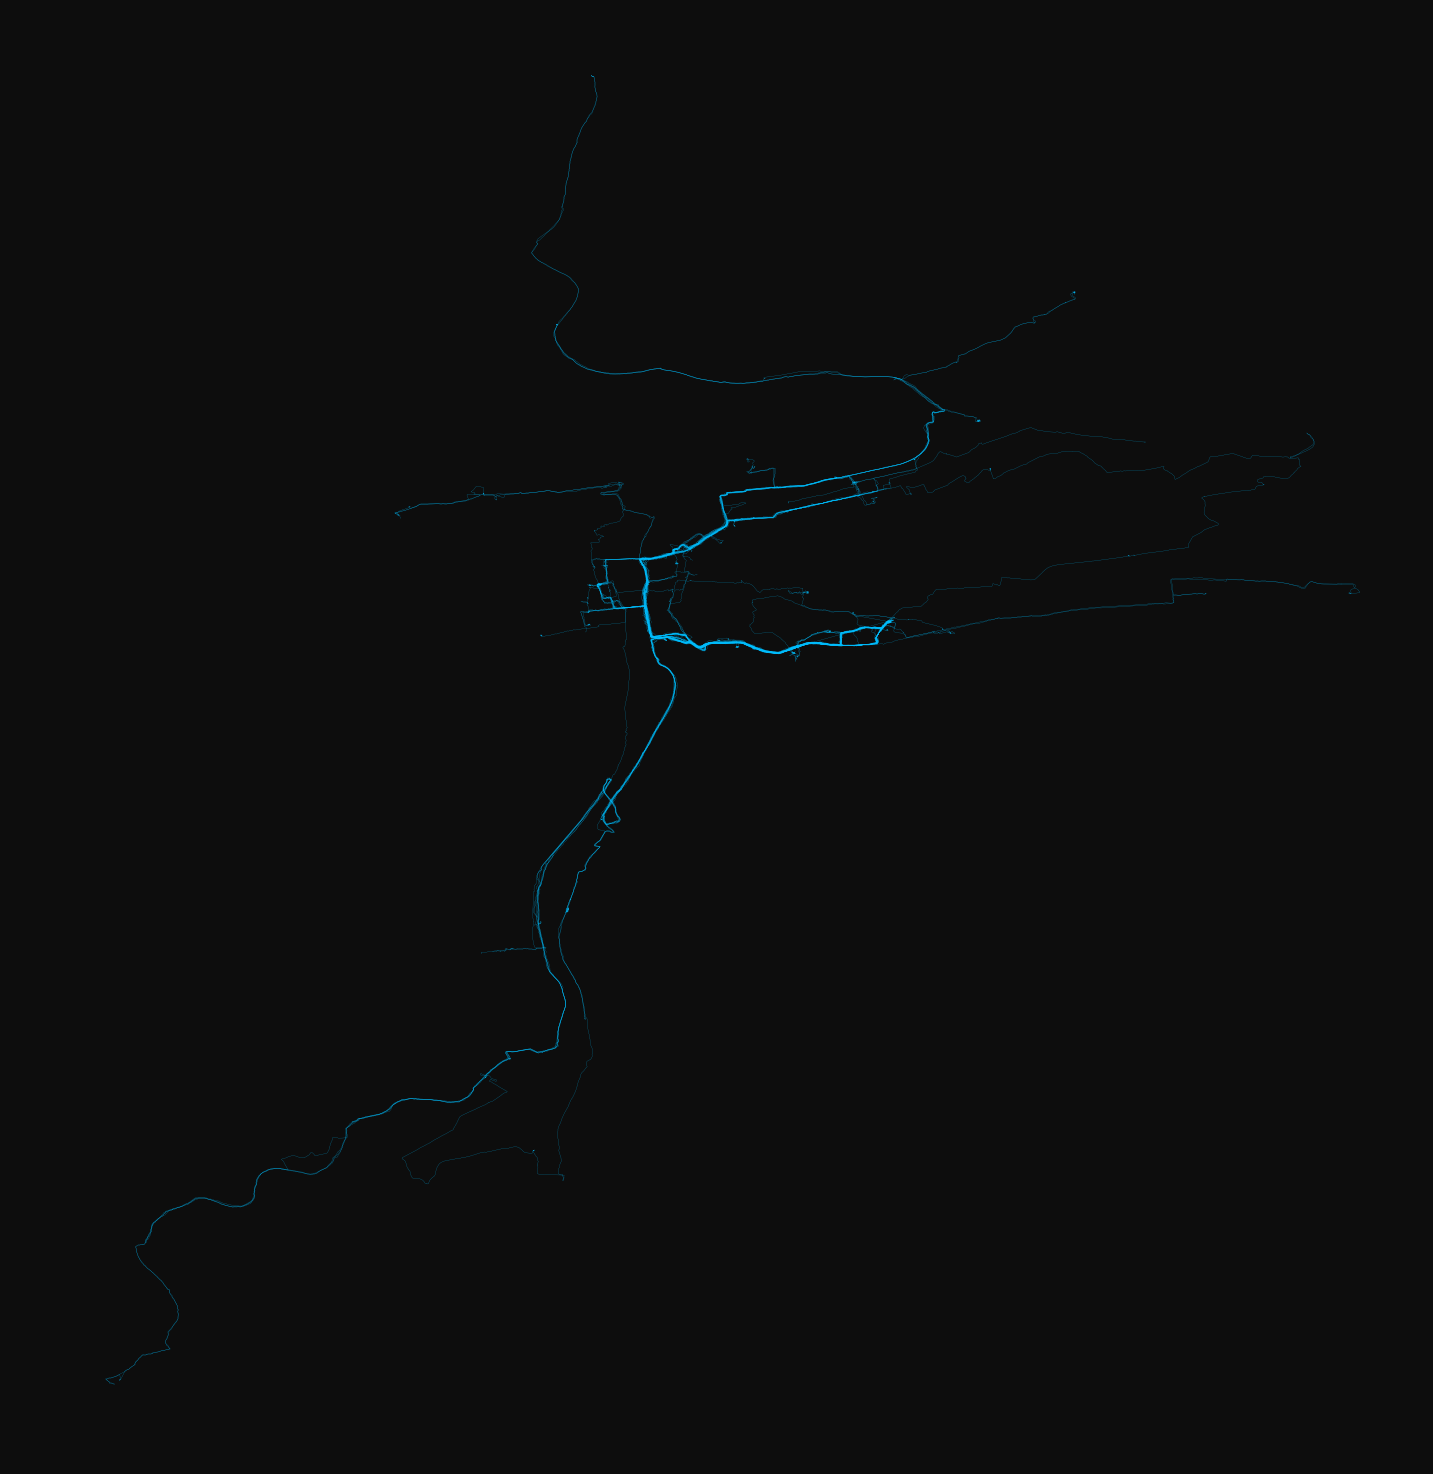

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor = '0.05', figsize=(20,20))
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)


top_left = (50.1836441962,14.224436)

bottom_right = (49.941902,14.706787)


for points in activities_points:
    lat, lon = zip(*points)
    if bottom_right[0] < lat[0] and lat[0] < top_left[0] and top_left[1] < lon[0] and lon[0] < bottom_right[1]:
        plt.plot(lon, lat, color = 'deepskyblue', lw = 0.2, alpha = 0.8)
    
# plt.savefig(filename, facecolor = fig.get_facecolor(), bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()